In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import csv
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

Mounted at /content/drive


In [ ]:
'''
Cell types
0 B
1 CD14+ Mono
2 CD16+ Mono
3 CD34+
4 CD8 T
5 DC
6  Eryth
7 Memory CD4 T
8 Mk
9	Naive CD4 T
10 NK
11 pDCs
12 T/Mono doublets
'''

Text(0.5, 1.0, 'Celltype B')

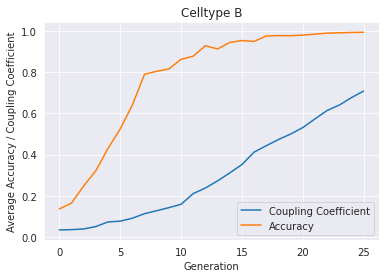

In [15]:
#print average coupling coefficient and accuracy for 25 generations for cell 0
data=[]
acc=[]
for d in range(26):
  data1=np.genfromtxt(f'results/cell_0_with_acc/{d}coefficient.csv', delimiter=",")
  data.append(np.average(data1))
  acc1=np.genfromtxt(f'results/cell_0_with_acc/{d}acc.csv', delimiter=",")
  acc.append(np.average(acc1))

sns.set_style("darkgrid")
ax = sns.lineplot(x=np.arange(len(data)), y=data,label="Coupling Coefficient")
sns.lineplot(x=np.arange(len(acc)), y=acc, label='Accuracy')
ax.set_ylabel('Average Accuracy / Coupling Coefficient')
ax.set_xlabel ('Generation')
ax.set_title('Celltype B')

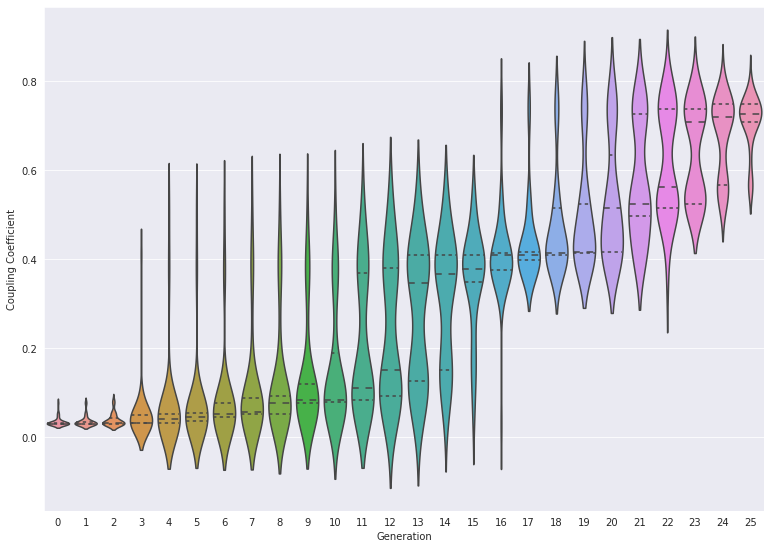

In [4]:
#violin plot of coupling coefficients over 25 generations dor cell 0 
data=[]
for d in range(26):
  data1=np.genfromtxt(f'results/cell_0_with_acc/{d}coefficient.csv', delimiter=",")
  data.append(data1)

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])

sns.violinplot(data=data, scale='width', inner='quartile')
ax.set_ylabel('Coupling Coefficient')
ax.set_xlabel ('Generation')

 
# show plot
plt.show()

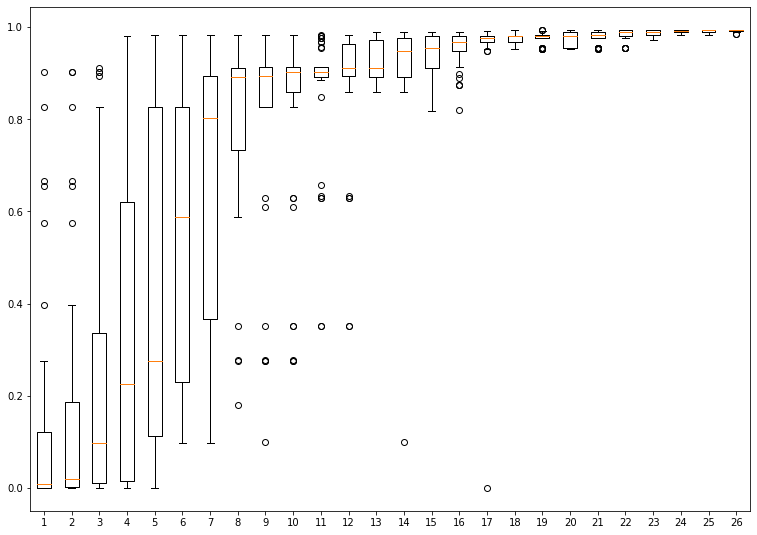

In [ ]:
#box plot of accuracy for cell 0
data=[]
for d in range(26):
  data1=np.genfromtxt(f'results/cell_0_with_acc/{d}acc.csv', delimiter=",")
  data.append(data1)

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

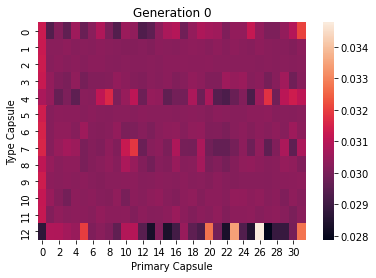

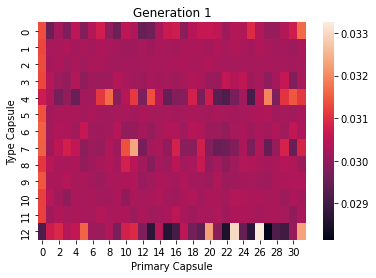

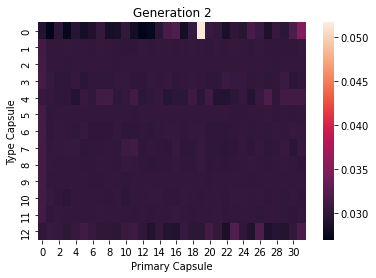

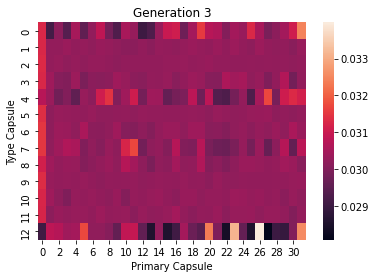

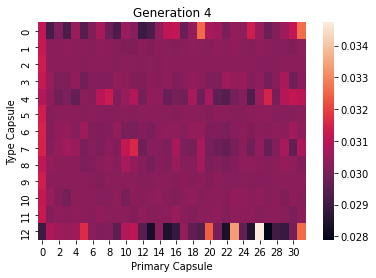

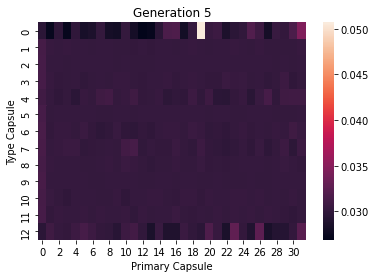

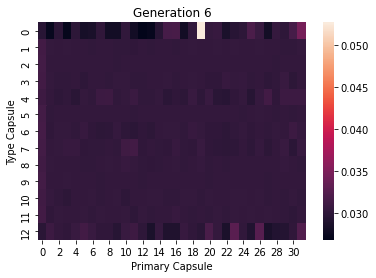

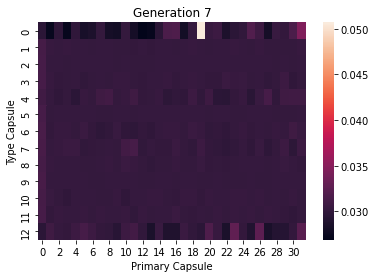

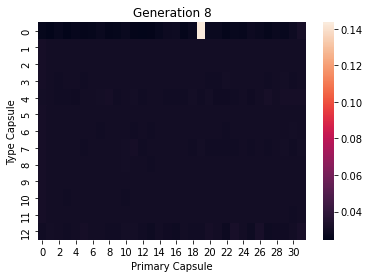

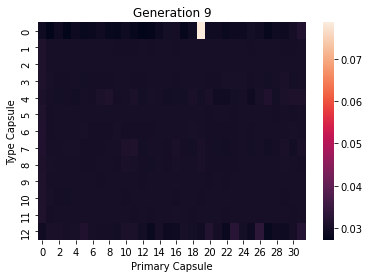

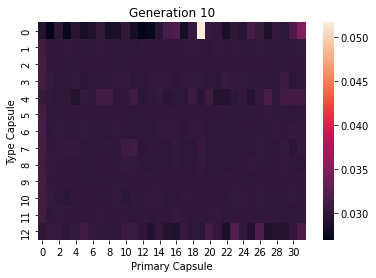

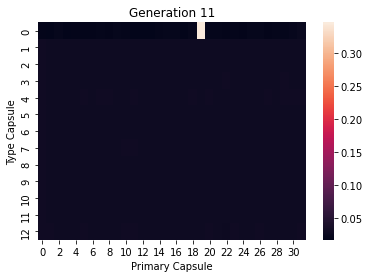

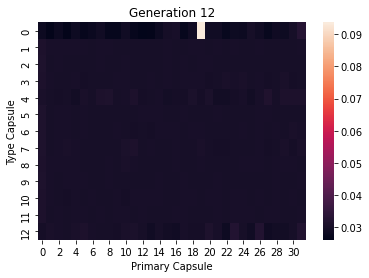

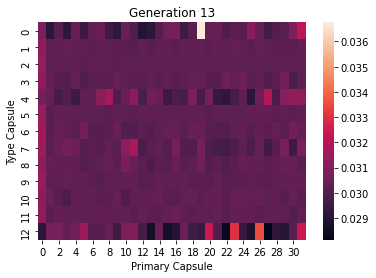

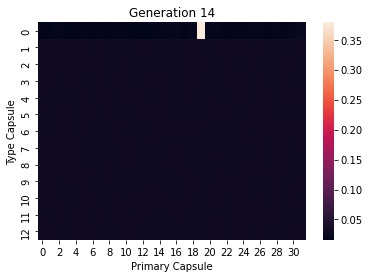

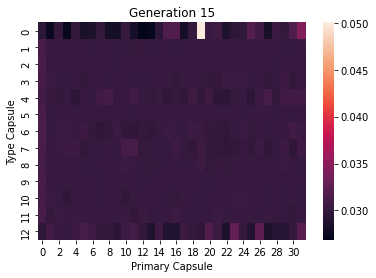

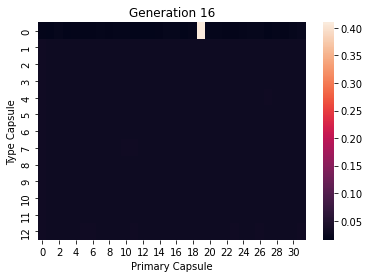

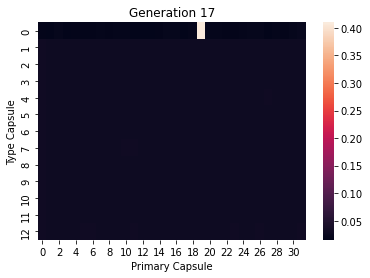

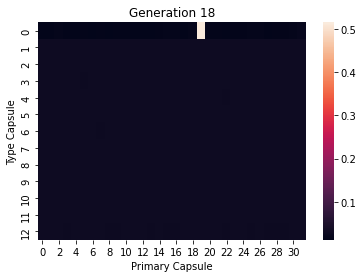

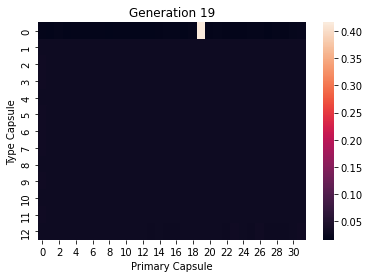

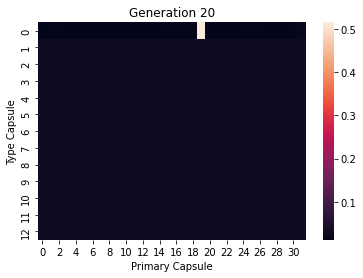

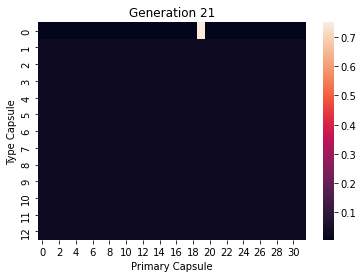

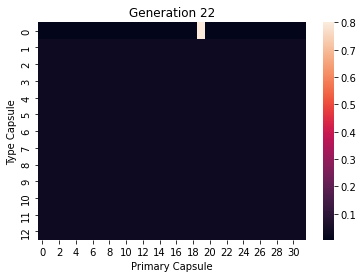

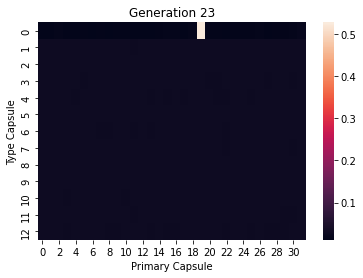

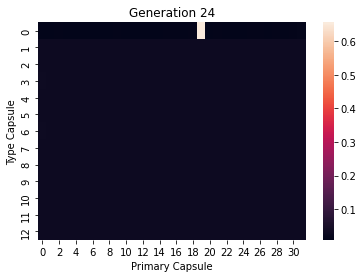

In [2]:
#print coupling coefficients for cell 0 after each generation
for generation in range(25):
  cc =np.genfromtxt(f'results/cell_0_with_acc/{generation}coup_gene_all_genetic.csv', delimiter=",")
  ax = sns.heatmap(cc )
  plt.xlabel("Primary Capsule")
  plt.ylabel("Type Capsule")
  ax.set_title(f'Generation {generation}')
  plt.show()
 

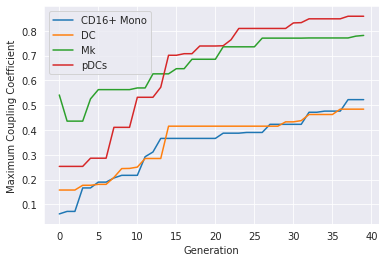

In [14]:
# Maximum CC for cell type 
import matplotlib.pyplot as plt
import numpy as np
cellname=["B", "CD14+ Mono", "CD16+ Mono", "CD34+", "CD8 T", "DC", "Eryth", "Memory CD4 T", "Mk",	"Naive CD4 T", "NK", "pDCs", "T/Mono doublets"]

sns.set_style("darkgrid")
for cell in [2,5,8,11]:
  data=[]
  data_max=[]
  for d in range(40):
    #data1=np.genfromtxt(f'results/cell_{cell}/cell{cell}_{d}coefficient.csv', delimiter=",")
    #data.append(np.average(data1))
    data1_max=np.genfromtxt(f'results/cell_{cell}/cell{cell}_{d}coefficient.csv', delimiter=",")
    data_max.append(np.max(data1_max))

  #ax = sns.lineplot(np.arange(len(data)), data,label=cellname[cell])
  ax = sns.lineplot(x=np.arange(len(data_max)), y=data_max,label=cellname[cell])
ax.set_ylabel('Maximum Coupling Coefficient')
ax.set_xlabel ('Generation')

# show plot
plt.show()

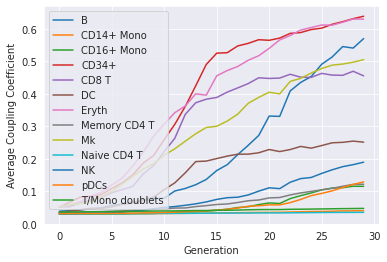

In [9]:
# Average CC for all cell types
import matplotlib.pyplot as plt
import numpy as np
cellname=["B", "CD14+ Mono", "CD16+ Mono", "CD34+", "CD8 T", "DC", "Eryth", "Memory CD4 T", "Mk",	"Naive CD4 T", "NK", "pDCs", "T/Mono doublets"]

sns.set_style("darkgrid")
for cell in range(13):
  data=[]
  for d in range(30):
    data1=np.genfromtxt(f'results/decreasing_size_50_10/cell{cell}_{d}coefficient.csv', delimiter=",")
    data.append(np.average(data1))
  ax = sns.lineplot(x=np.arange(len(data)), y=data,label=cellname[cell])
ax.set_ylabel('Average Coupling Coefficient')
ax.set_xlabel ('Generation')

# show plot
plt.show()

In [21]:
label = np.genfromtxt('data/cell_type_no_onlyrna.csv',delimiter=',').astype('int64')
scale_data_all = pd.read_csv('data/rna_scaled.csv', index_col=0)
scale_data_all = scale_data_all.transpose()
colnames=scale_data_all.columns

In [34]:
#get gene set with maximim coupling coefficient for every generation
cell=2
for i in range(40):
  population_cc=np.genfromtxt(f'results/cell_{cell}/cell{cell}_{i}coefficient.csv', delimiter=",")
  cc=np.amax(population_cc)
  print("Maximum coupling coefficient", cc)
  #get index of individual with highest cc
  index=np.where(population_cc == cc)
  #get gene set of individual with highest cc
  genes=np.genfromtxt(f'results/cell_{cell}/cell{cell}_{i}population.csv', delimiter=",")
  genes_max=genes[index[0][0]]
  #print(genes_max)
  print(colnames[genes_max.astype(int)])


Maximum coupling coefficient 0.06181180699017391
Index(['A4GALT', 'AJ006998.2', 'ANXA2', 'AP000442.1', 'APOC1', 'ATPIF1',
       'C18orf56', 'CA1', 'CAPZA2', 'CDC6', 'CDK1', 'CIT', 'CLIC3', 'CRLF1',
       'CSTA', 'CTA-250D10.23', 'CTD-3234P18.2', 'CYTL1', 'DDAH2', 'DHFR',
       'DLGAP5', 'DNAAF3', 'DSN1', 'DTD1', 'EGLN3', 'EXO1', 'FRMD3',
       'GADD45GIP1', 'GCSAML', 'GPC5', 'GUCY1A3', 'GUCY1B3', 'GYPC', 'H2AFZ',
       'HES4', 'HIST1H3J', 'HIST2H2AB', 'HLA-DQB1', 'IGLV2-23', 'IGLV4-60',
       'ILF2', 'IRF8', 'KCNK6', 'KIAA1407', 'KIF24', 'LILRA5', 'LILRB2',
       'LTBP1', 'MARCKS', 'MDK', 'MEST', 'MPC2', 'MT2A', 'MYLK', 'NCAPH',
       'NR4A1', 'NT5DC2', 'NUCB2', 'NXF3', 'OR2W3', 'PCNA', 'PLBD1', 'PRL',
       'RAB13', 'RCCD1', 'RGCC', 'RNA28S5', 'RNASE1', 'RNASE2', 'RP1-244F24.1',
       'RP11-103C16.2', 'RP11-290F20.3', 'RP11-315O6.1', 'RP11-428G5.5',
       'SLC43A1', 'SLC45A3', 'SLC48A1', 'SMC2', 'SNRPD1', 'SOCS2', 'SPCS3',
       'STARD6', 'TANGO2', 'TIGIT', 'TMEM97', 'TNFR

In [47]:
#get the of the genes of the last generation that appear the most
cell=2
last_generation=40
genes=np.genfromtxt(f'results/cell_{cell}/cell{cell}_{last_generation}population.csv', delimiter=",")
unique, frequency = np.unique(genes, return_counts = True)
print("Genes that appear more than 40 times: ", colnames[unique[frequency>40].astype(int)])
print("Amount of genes: ", len(colnames[unique[frequency>40].astype(int)]))
print(frequency)

Genes that appear more than 40 times:  Index(['AC104809.4', 'AL161626.1', 'BATF3', 'C1QA', 'CDC42BPA', 'CDKN1C',
       'CENPW', 'CSTA', 'GKN2', 'HCK', 'HES4', 'HLA-DQB1', 'KLF1', 'LRRC25',
       'LST1', 'PARM1', 'RNASE1', 'RP1-244F24.1', 'RP1-86D1.2',
       'RP11-1008C21.1', 'RP11-103C16.2', 'RP11-290F20.3', 'SGOL1', 'SNRPD1',
       'TSC22D1', 'MOUSE-Rplp0', 'MOUSE-Hmga2'],
      dtype='object')
Amount of genes:  27
[  1   1   4  51   9  10   6   1  13  18   2   2   5  32   3  48   1   6
   5  28   1  18   2   4  29  24   6  15   4   8   2   2  15   1   4   2
   3   3   5   8  45   1   7   1   4   1   1   1   2   8  29   1   6  27
  49  15   9   3   3   4   5  39   1   1  13   7  15   8   8  10   9   2
  10  27  16   1   4   2  17   2   1   9  45   1  21   6 122  31   2  27
  29  64  20  19   2   5  16   6   5   1   1   1   8   2  17   1   9   7
  16   3  13  15  46   2  29  37  11  37  16  25  14   1  11  22   2  14
  19  10  22  14   1   3   1   1   4   1  12  21   3  10   4  12 